In [1]:
#Compile Documents, featurize, compare

In [2]:
import nltk

In [3]:
#nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp

      Unzipping corpora/stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [4]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamcollection')]

In [6]:
len(messages)

5574

In [9]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [10]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [12]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [13]:
import pandas as pd

In [21]:
messages = pd.read_csv('smsspamcollection/SMSSpamcollection', sep = '\t', names=['label','message'])

In [22]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [26]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [27]:
messages['length'] = messages['message'].apply(len)

In [28]:
messages

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: xlabel='length', ylabel='Count'>

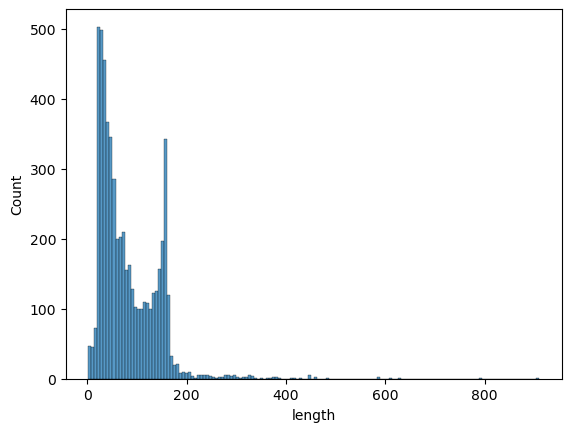

In [34]:
sns.histplot(messages['length'], bins=150)

In [35]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [38]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

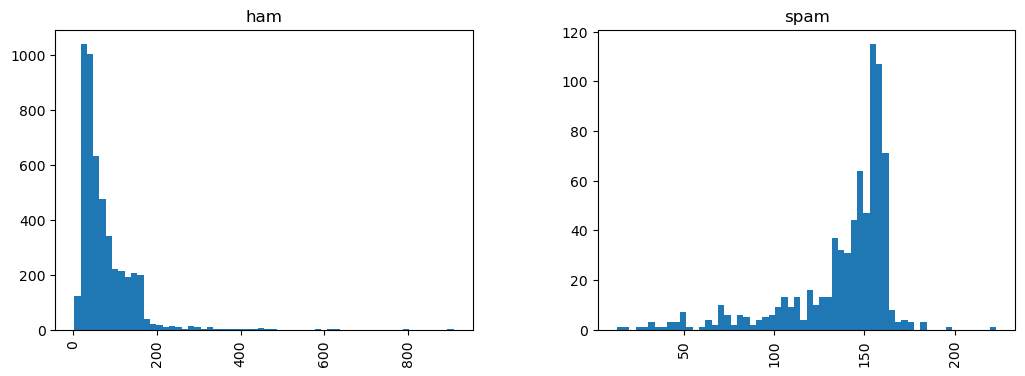

In [44]:
messages.hist(column='length',by='label', bins=60, figsize=(12,4))

#Next, we will convert a sequence of characters into vectors - a sequence of numbers

In [46]:
import string

In [47]:
mess = 'Sample Message! Notice: it has punctuation.'

In [48]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [50]:
nopunc = [c for c in mess if c not in string.punctuation]

In [51]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'M',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [54]:
from nltk.corpus import stopwords

In [56]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [57]:
nopunc = ''.join(nopunc)

In [59]:
nopunc.split()

['Sample', 'Message', 'Notice', 'it', 'has', 'punctuation']

In [60]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [61]:
clean_mess

['Sample', 'Message', 'Notice', 'punctuation']

In [62]:
def text_process(mess):
    """
    1. remove punc
    2. remove stopwords
    3. return list of clean text words
    """
    
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean_text = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_text

In [63]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [64]:
#Now we have a list of tokens, we need to convert them into a list of vectors that ML models can understand.

In [65]:
#bag of words

In [66]:
from sklearn.feature_extraction.text import CountVectorizer

In [68]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [69]:
bow_transformer.vocabulary_

{'Go': 2060,
 'jurong': 7555,
 'point': 8917,
 'crazy': 5769,
 'Available': 1110,
 'bugis': 5218,
 'n': 8336,
 'great': 6937,
 'world': 11163,
 'la': 7668,
 'e': 6217,
 'buffet': 5217,
 'Cine': 1483,
 'got': 6906,
 'amore': 4653,
 'wat': 10965,
 'Ok': 3064,
 'lar': 7701,
 'Joking': 2451,
 'wif': 11072,
 'u': 10698,
 'oni': 8590,
 'Free': 1941,
 'entry': 6331,
 '2': 423,
 'wkly': 11123,
 'comp': 5619,
 'win': 11084,
 'FA': 1833,
 'Cup': 1551,
 'final': 6557,
 'tkts': 10512,
 '21st': 443,
 'May': 2804,
 '2005': 430,
 'Text': 3953,
 '87121': 871,
 'receive': 9252,
 'questionstd': 9159,
 'txt': 10686,
 'rateTCs': 9200,
 'apply': 4731,
 '08452810075over18s': 73,
 'U': 4068,
 'dun': 6204,
 'say': 9554,
 'early': 6222,
 'hor': 7186,
 'c': 5261,
 'already': 4629,
 'Nah': 2948,
 'dont': 6123,
 'think': 10433,
 'goes': 6877,
 'usf': 10799,
 'lives': 7842,
 'around': 4777,
 'though': 10450,
 'FreeMsg': 1943,
 'Hey': 2222,
 'darling': 5864,
 '3': 543,
 'weeks': 11011,
 'word': 11150,
 'back': 4893

In [70]:
len(bow_transformer.vocabulary_)

11425

In [71]:
mess4 = messages['message'][3]

In [72]:
mess4

'U dun say so early hor... U c already then say...'

In [89]:
bow4 = bow_transformer.transform([mess4])

In [93]:
print(bow_transformer.transform([mess4]))

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [92]:
print(bow4.shape)

(1, 11425)


In [79]:
bow_transformer.get_feature_names_out()[9554]

'say'

In [80]:
messages_bow = bow_transformer.transform(messages['message'])

In [81]:
print(f'Shape of the Sparse Matrix: {messages_bow.shape}')

Shape of the Sparse Matrix: (5572, 11425)


In [82]:
messages_bow.nnz

50548

In [85]:
sparsity = (100.0 * messages_bow.nnz/ (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


In [86]:
from sklearn.feature_extraction.text import TfidfTransformer

In [87]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [94]:
tfidf4 = tfidf_transformer.transform(bow4)

In [95]:
tfidf4

<1x11425 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [96]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [103]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [104]:
message_tfidf = tfidf_transformer.transform(messages_bow)

In [105]:
from sklearn.naive_bayes import MultinomialNB

In [106]:
spam_detect_model = MultinomialNB().fit(message_tfidf, messages['label'])

In [108]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [111]:
messages['label'][3]

'ham'

In [112]:
all_pred = spam_detect_model.predict(message_tfidf)

In [113]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
msg_train,msg_test,label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.3)

In [116]:
msg_train

4433    Dont think you need yellow card for uk travel....
2289                          Dont you have message offer
2878    twenty past five he said will this train have ...
3274    Just finished eating. Got u a plate. NOT lefto...
3059    You are now unsubscribed all services. Get ton...
                              ...                        
4159    It certainly puts things into perspective when...
4135    Is it your yahoo boys that bring in the perf? ...
37                           I see the letter B on my car
4615    hows my favourite person today? r u workin har...
2164    hi my darlin im on my way to London and we hav...
Name: message, Length: 3900, dtype: object

In [118]:
msg_test

3168    When people see my msgs, They think Iam addict...
981     If he started searching he will get job in few...
4136    No need to say anything to me. I know i am an ...
2940          Are you ok. What happen to behave like this
2474                            Ok lor wat time ü finish?
                              ...                        
144            I know you are. Can you pls open the back?
4776    So many people seems to be special at first si...
11      SIX chances to win CASH! From 100 to 20,000 po...
1608    Jus telling u dat i'll b leaving 4 shanghai on...
1902                               Sorry, I'll call later
Name: message, Length: 1672, dtype: object

In [119]:
label_train

4433     ham
2289     ham
2878     ham
3274     ham
3059    spam
        ... 
4159     ham
4135     ham
37       ham
4615     ham
2164     ham
Name: label, Length: 3900, dtype: object

In [120]:
from sklearn.pipeline import Pipeline

In [123]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [124]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x287192fc0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [125]:
predictions = pipeline.predict(msg_test)

In [126]:
from sklearn.metrics import classification_report

In [127]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1470
        spam       1.00      0.72      0.84       202

    accuracy                           0.97      1672
   macro avg       0.98      0.86      0.91      1672
weighted avg       0.97      0.97      0.96      1672

